In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras import layers, models
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [ ]:
batch_size = 32
img_height = 48
img_width = 48

train_dir = 'Data_Sets/train'
test_dir = 'Data_Sets/test'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Emotion Categories:", class_names)


Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.
Emotion Categories: ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
normalization_layer = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))


In [ ]:
import os
import pandas as pd

def count_images_per_class(directory):
    class_counts = {}
    for emotion in os.listdir(directory):
        emotion_path = os.path.join(directory, emotion)
        if os.path.isdir(emotion_path):
            class_counts[emotion] = len(os.listdir(emotion_path))
    return class_counts

train_counts = count_images_per_class('Data_Sets/train')
test_counts = count_images_per_class('Data_Sets/test')

df_counts = pd.DataFrame({
    "Emotion": list(train_counts.keys()),
    "Train Count": list(train_counts.values()),
    "Test Count": [test_counts.get(emotion, 0) for emotion in train_counts.keys()]
})
df_counts.sort_values("Train Count", ascending=False, inplace=True)
df_counts


,Emotion,Train Count,Test Count
3,happy,7215,1774
4,neutral,4965,1233
5,sad,4830,1247
2,fearful,4097,1024
0,angry,3995,958
6,surprised,3171,831
1,disgusted,436,111


C:\Users\thoma\AppData\Local\Temp\ipykernel_10252\134476026.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Emotion", y="Train Count", data=df_counts, palette="viridis")


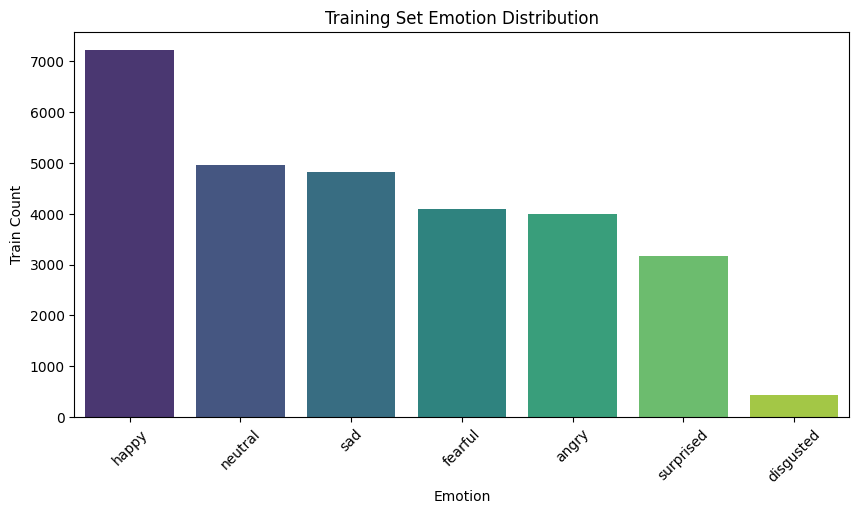

C:\Users\thoma\AppData\Local\Temp\ipykernel_10252\134476026.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Emotion", y="Test Count", data=df_counts, palette="plasma")


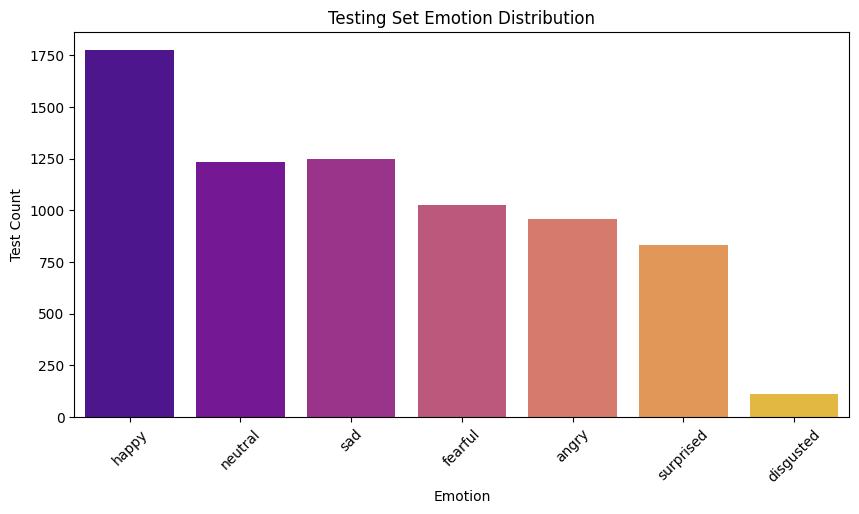

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(x="Emotion", y="Train Count", data=df_counts, palette="viridis")
plt.title("Training Set Emotion Distribution")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x="Emotion", y="Test Count", data=df_counts, palette="plasma")
plt.title("Testing Set Emotion Distribution")
plt.xticks(rotation=45)
plt.show()


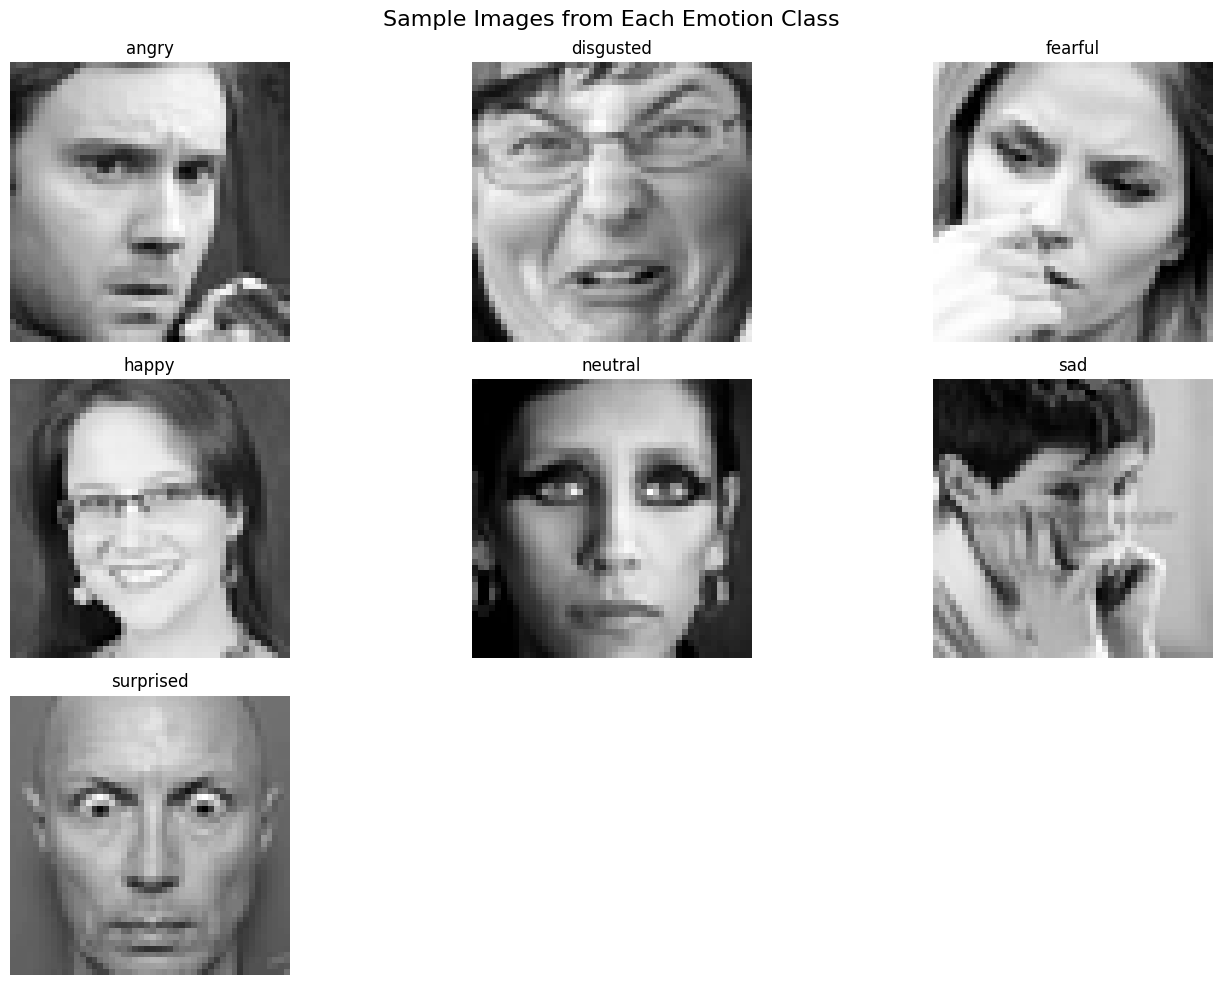

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_samples(data_dir, class_names):
    plt.figure(figsize=(14, 10))
    for i, class_name in enumerate(class_names):
        class_path = os.path.join(data_dir, class_name)
        image_name = os.listdir(class_path)[0]  # First image
        image_path = os.path.join(class_path, image_name)
        img = mpimg.imread(image_path)

        plt.subplot(3, 3, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(class_name)
        plt.axis('off')

    plt.suptitle("Sample Images from Each Emotion Class", fontsize=16)
    plt.tight_layout()
    plt.show()

show_samples('Data_Sets/train', class_names)


In [ ]:
from PIL import Image
from collections import Counter

def get_image_shapes(directory):
    shapes = []
    for emotion in os.listdir(directory):
        emotion_path = os.path.join(directory, emotion)
        if os.path.isdir(emotion_path):
            for file in os.listdir(emotion_path):
                file_path = os.path.join(emotion_path, file)
                try:
                    with Image.open(file_path) as img:
                        shapes.append(img.size)
                except:
                    continue
    return Counter(shapes)

train_shapes = get_image_shapes('Data_Sets/train')
print("Most common image shapes in training set:", train_shapes.most_common(5))


Most common image shapes in training set: [((48, 48), 28709)]


C:\Users\thoma\AppData\Local\Temp\ipykernel_10252\2515566685.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Emotion", y="Train %", data=df_counts, palette="coolwarm")


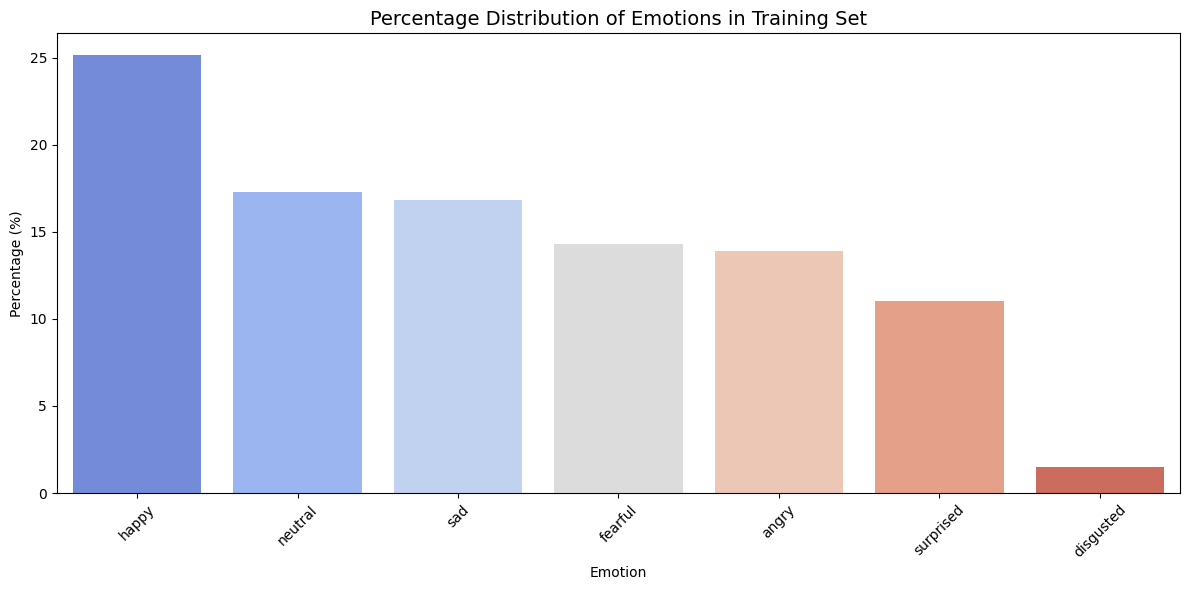

In [ ]:
df_counts["Train %"] = (df_counts["Train Count"] / df_counts["Train Count"].sum()) * 100
df_counts["Test %"] = (df_counts["Test Count"] / df_counts["Test Count"].sum()) * 100

plt.figure(figsize=(12, 6))
sns.barplot(x="Emotion", y="Train %", data=df_counts, palette="coolwarm")
plt.title("Percentage Distribution of Emotions in Training Set", fontsize=14)
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


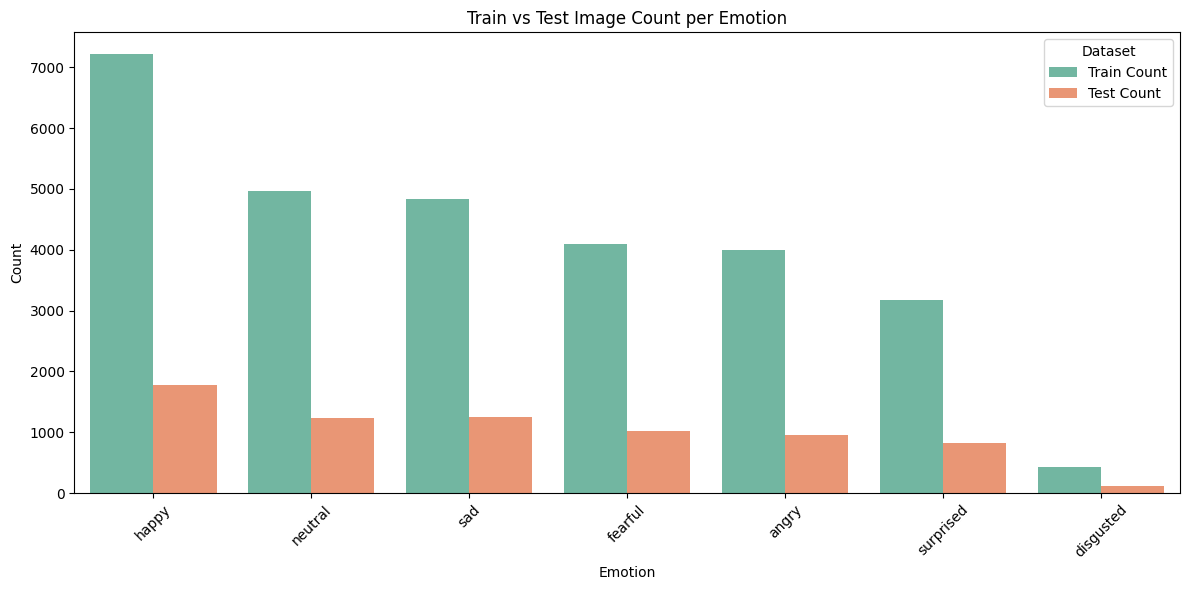

In [ ]:
df_counts_melted = pd.melt(df_counts[["Emotion", "Train Count", "Test Count"]],
                           id_vars="Emotion", var_name="Dataset", value_name="Count")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_counts_melted, x="Emotion", y="Count", hue="Dataset", palette="Set2")
plt.title("Train vs Test Image Count per Emotion")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\thoma\AppData\Local\Temp\ipykernel_10252\3817290686.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=brightness_df, x="Emotion", y="Brightness", palette="Spectral")


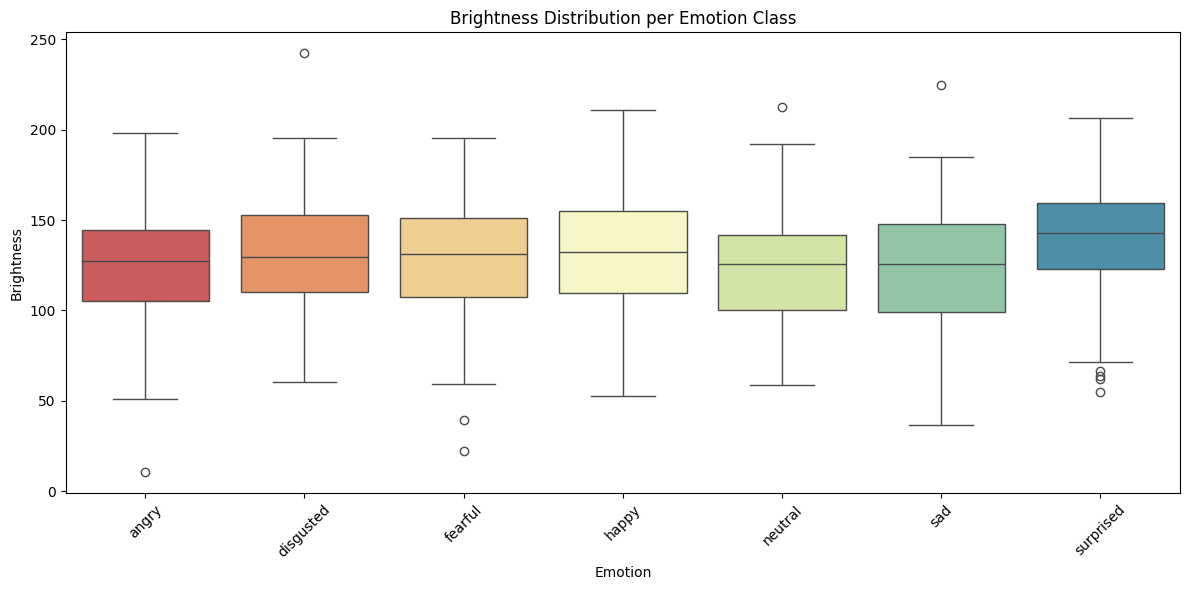

In [ ]:
import cv2

def get_avg_brightness(directory):
    brightness_data = []
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            for img_name in os.listdir(label_path)[:100]:  # sample 100 images per class
                img_path = os.path.join(label_path, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    brightness = np.mean(img)
                    brightness_data.append((label, brightness))
    return pd.DataFrame(brightness_data, columns=["Emotion", "Brightness"])

brightness_df = get_avg_brightness('Data_Sets/train')

plt.figure(figsize=(12,6))
sns.boxplot(data=brightness_df, x="Emotion", y="Brightness", palette="Spectral")
plt.title("Brightness Distribution per Emotion Class")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


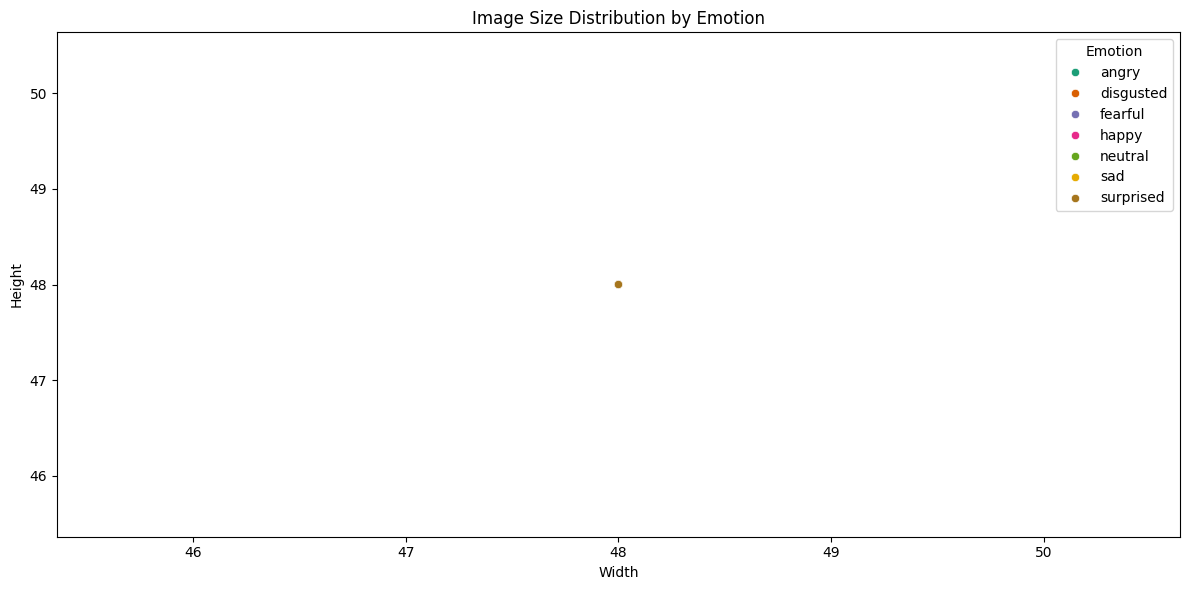

In [ ]:
img_dims = []

for emotion in os.listdir("Data_Sets/train"):
    class_path = os.path.join("Data_Sets/train", emotion)
    for img_name in os.listdir(class_path)[:100]:
        try:
            img = Image.open(os.path.join(class_path, img_name))
            img_dims.append((img.size[0], img.size[1], emotion))
        except:
            continue

dim_df = pd.DataFrame(img_dims, columns=["Width", "Height", "Emotion"])

plt.figure(figsize=(12,6))
sns.scatterplot(data=dim_df, x="Width", y="Height", hue="Emotion", palette="Dark2")
plt.title("Image Size Distribution by Emotion")
plt.tight_layout()
plt.show()


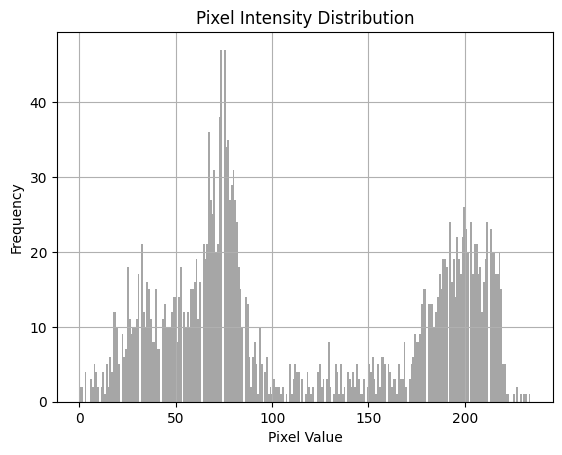

In [ ]:
def plot_pixel_histogram(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.hist(img.ravel(), bins=256, color='gray', alpha=0.7)
    plt.title("Pixel Intensity Distribution")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

sample_image_path = os.path.join("Data_Sets/train/happy", os.listdir("Data_Sets/train/happy")[0])
plot_pixel_histogram(sample_image_path)


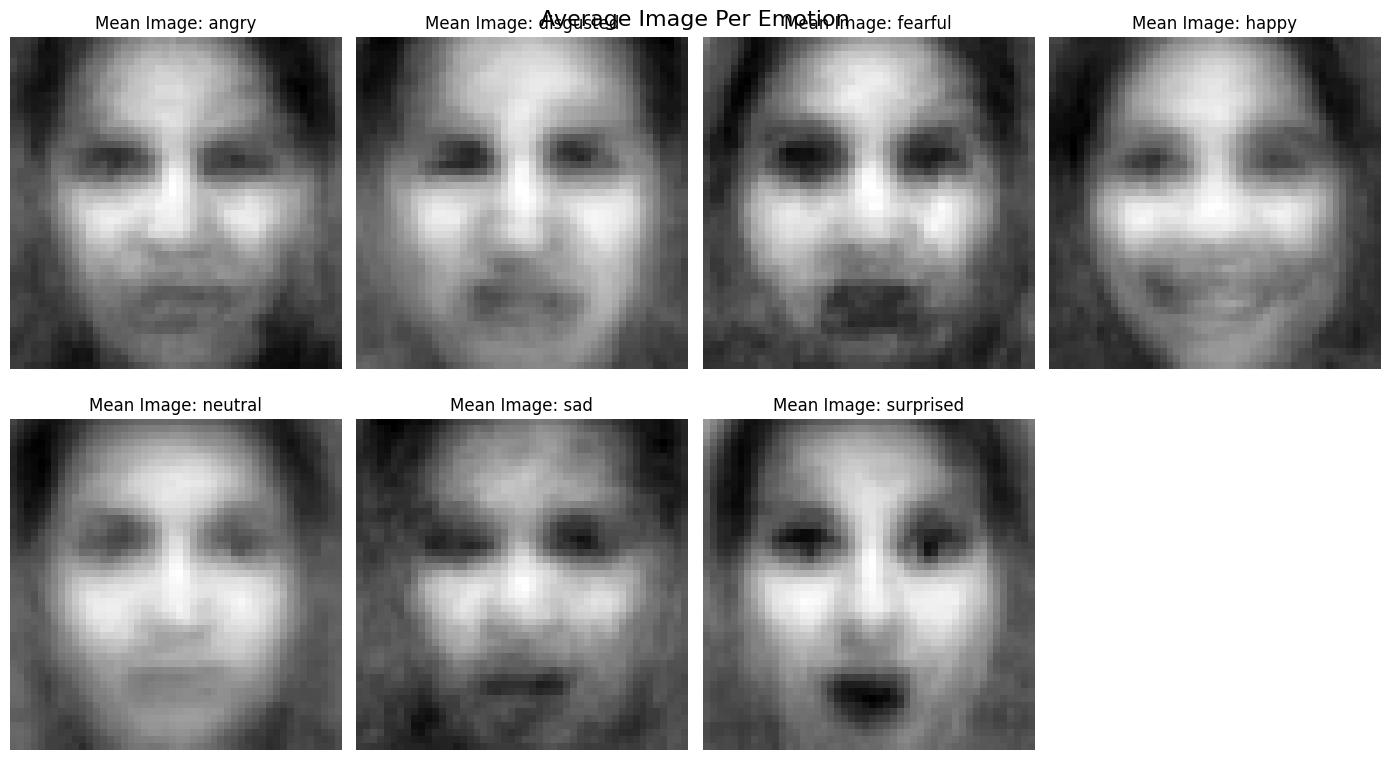

In [ ]:
def compute_mean_image(class_dir, img_size=(48, 48)):
    images = []
    for img_name in os.listdir(class_dir)[:200]:  # limit for speed
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img_resized = cv2.resize(img, img_size)
            images.append(img_resized.astype(np.float32))
    if images:
        mean_img = np.mean(images, axis=0)
        return mean_img
    return None

plt.figure(figsize=(14, 8))
for i, emotion in enumerate(class_names):
    mean_img = compute_mean_image(os.path.join("Data_Sets/train", emotion))
    if mean_img is not None:
        plt.subplot(2, 4, i+1)
        plt.imshow(mean_img, cmap='gray')
        plt.title(f"Mean Image: {emotion}")
        plt.axis('off')
plt.tight_layout()
plt.suptitle("Average Image Per Emotion", fontsize=16)
plt.show()


C:\Users\thoma\AppData\Local\Temp\ipykernel_10252\1570252171.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_blur, x='Emotion', y='Blur_Score', palette='coolwarm')


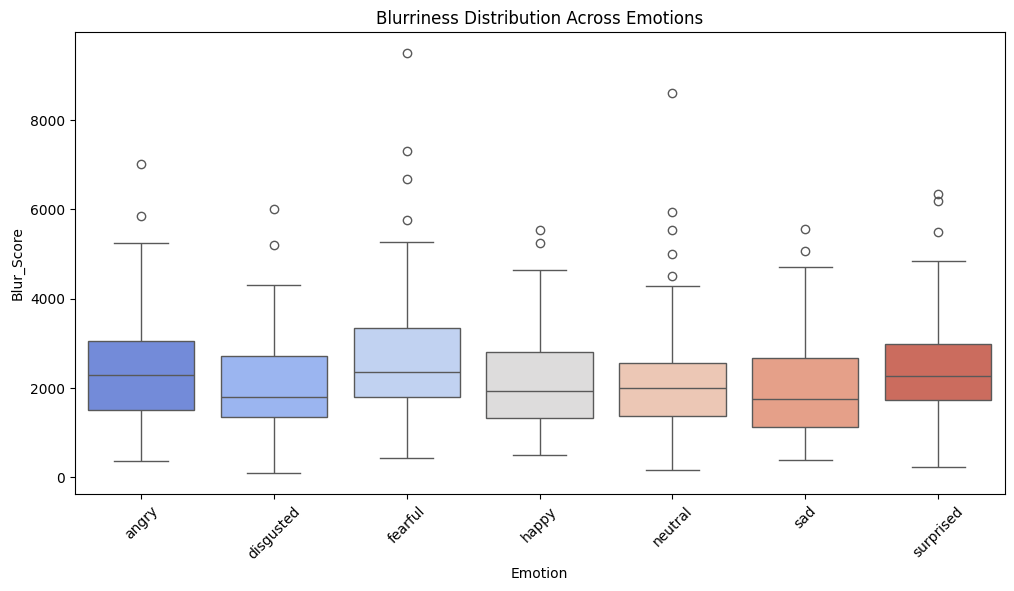

In [ ]:
def compute_blurriness_score(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        return cv2.Laplacian(image, cv2.CV_64F).var()
    return None

blur_scores = []

for emotion in os.listdir('Data_Sets/train'):
    emotion_dir = os.path.join('Data_Sets/train', emotion)
    for img_name in os.listdir(emotion_dir)[:100]:
        img_path = os.path.join(emotion_dir, img_name)
        score = compute_blurriness_score(img_path)
        if score is not None:
            blur_scores.append((emotion, score))

df_blur = pd.DataFrame(blur_scores, columns=['Emotion', 'Blur_Score'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_blur, x='Emotion', y='Blur_Score', palette='coolwarm')
plt.title("Blurriness Distribution Across Emotions")
plt.xticks(rotation=45)
plt.show()


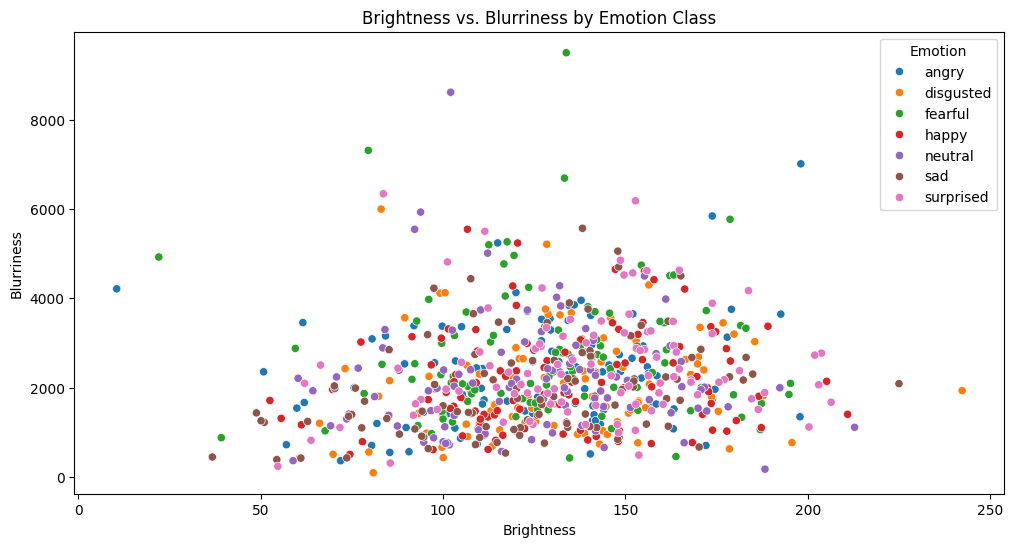

In [ ]:
brightness_vs_blur = []

for emotion in os.listdir('Data_Sets/train'):
    emotion_dir = os.path.join('Data_Sets/train', emotion)
    for img_name in os.listdir(emotion_dir)[:100]:
        img_path = os.path.join(emotion_dir, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            brightness = np.mean(img)
            blur_score = cv2.Laplacian(img, cv2.CV_64F).var()
            brightness_vs_blur.append((emotion, brightness, blur_score))

df_bvb = pd.DataFrame(brightness_vs_blur, columns=['Emotion', 'Brightness', 'Blurriness'])

plt.figure(figsize=(12,6))
sns.scatterplot(data=df_bvb, x='Brightness', y='Blurriness', hue='Emotion', palette='tab10')
plt.title("Brightness vs. Blurriness by Emotion Class")
plt.show()


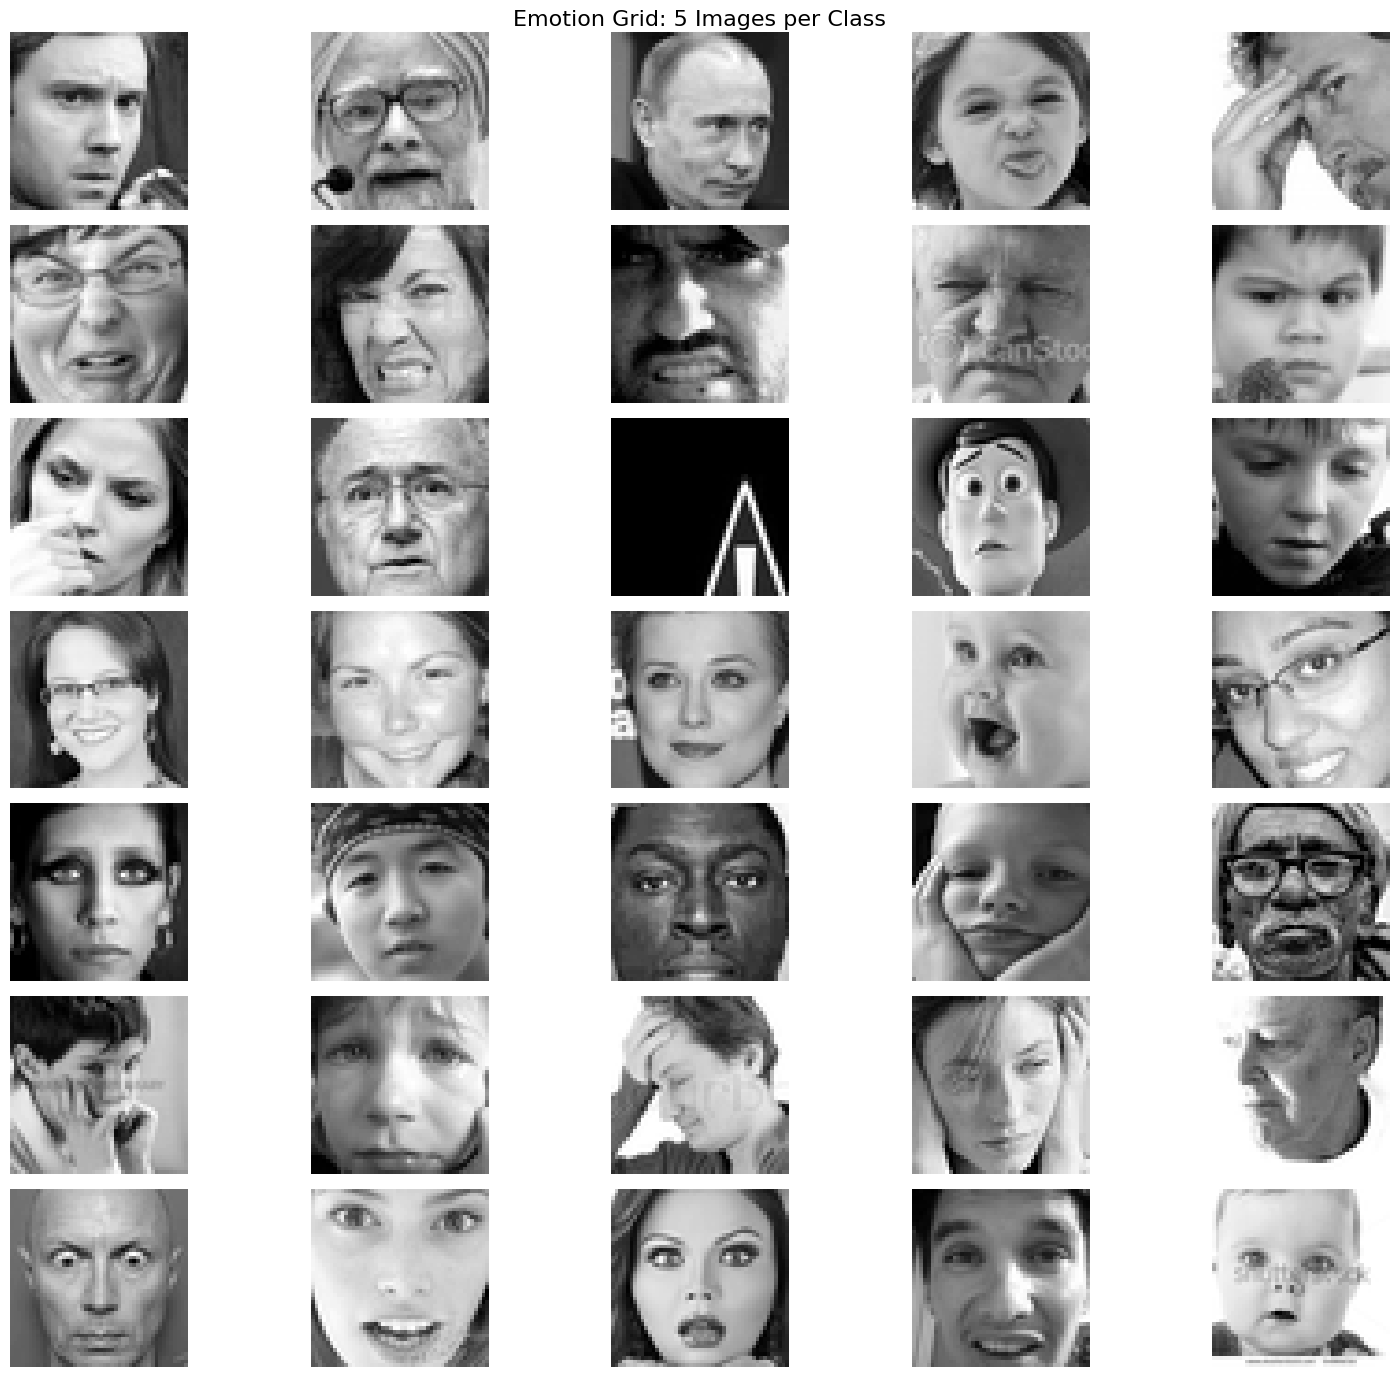

In [ ]:
def plot_image_grid(directory, class_names, rows=7, cols=5):
    plt.figure(figsize=(16, 14))
    for i, emotion in enumerate(class_names):
        emotion_dir = os.path.join(directory, emotion)
        images = os.listdir(emotion_dir)[:cols]
        for j, img_name in enumerate(images):
            img_path = os.path.join(emotion_dir, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                plt.subplot(rows, cols, i * cols + j + 1)
                plt.imshow(img, cmap='gray')
                plt.axis('off')
                if j == 0:
                    plt.ylabel(emotion, fontsize=12)
    plt.suptitle("Emotion Grid: 5 Images per Class", fontsize=16)
    plt.tight_layout()
    plt.show()

plot_image_grid("Data_Sets/train", class_names)


C:\Users\thoma\AppData\Local\Temp\ipykernel_10252\1977093942.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_stats, x='Emotion', y='Skewness', palette='Set2')


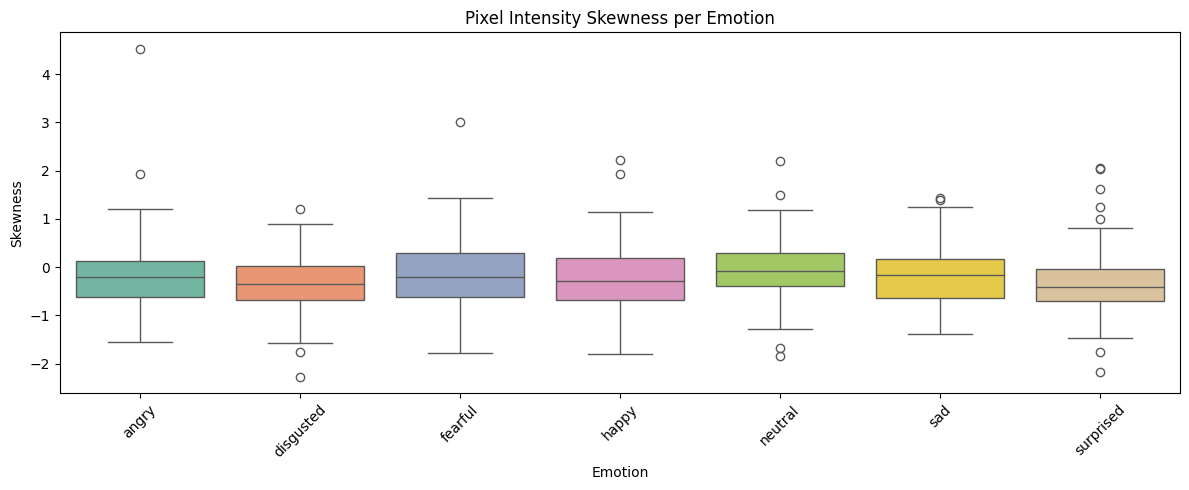

C:\Users\thoma\AppData\Local\Temp\ipykernel_10252\1977093942.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_stats, x='Emotion', y='Kurtosis', palette='Set1')


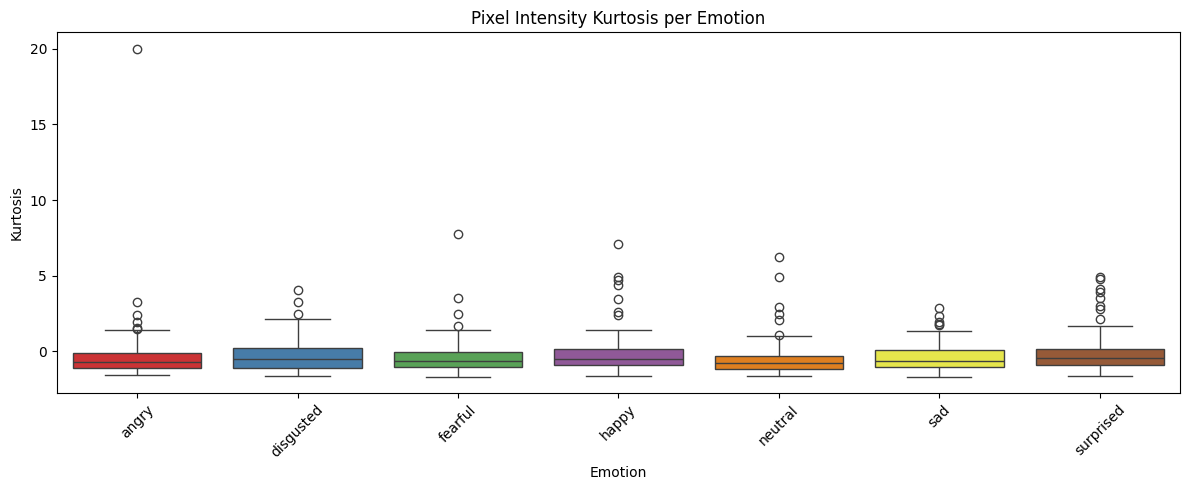

In [ ]:
from scipy.stats import skew, kurtosis

stats = []

for emotion in os.listdir('Data_Sets/train'):
    emotion_dir = os.path.join('Data_Sets/train', emotion)
    for img_name in os.listdir(emotion_dir)[:100]:
        img_path = os.path.join(emotion_dir, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            flat_pixels = img.flatten()
            stats.append({
                "Emotion": emotion,
                "Skewness": skew(flat_pixels),
                "Kurtosis": kurtosis(flat_pixels)
            })

df_stats = pd.DataFrame(stats)

plt.figure(figsize=(12,5))
sns.boxplot(data=df_stats, x='Emotion', y='Skewness', palette='Set2')
plt.title("Pixel Intensity Skewness per Emotion")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(data=df_stats, x='Emotion', y='Kurtosis', palette='Set1')
plt.title("Pixel Intensity Kurtosis per Emotion")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\thoma\AppData\Local\Temp\ipykernel_10252\2344553478.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ratios, x='Emotion', y='Aspect_Ratio', palette='Paired')


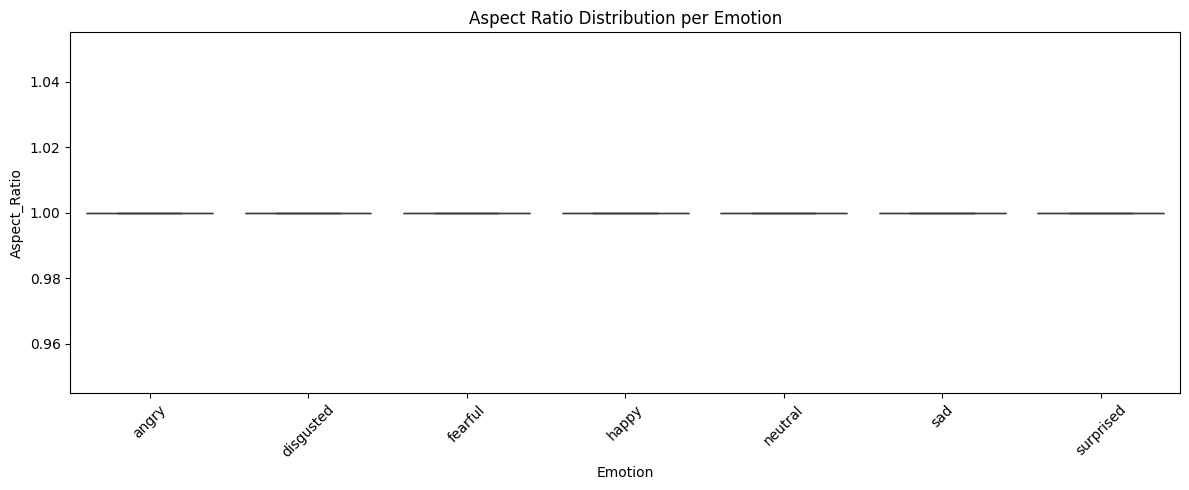

In [ ]:
aspect_ratios = []

for emotion in os.listdir("Data_Sets/train"):
    class_path = os.path.join("Data_Sets/train", emotion)
    for img_name in os.listdir(class_path)[:200]:
        img_path = os.path.join(class_path, img_name)
        try:
            img = Image.open(img_path)
            width, height = img.size
            ratio = width / height
            aspect_ratios.append((emotion, ratio))
        except:
            continue

df_ratios = pd.DataFrame(aspect_ratios, columns=["Emotion", "Aspect_Ratio"])

plt.figure(figsize=(12, 5))
sns.boxplot(data=df_ratios, x='Emotion', y='Aspect_Ratio', palette='Paired')
plt.title("Aspect Ratio Distribution per Emotion")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import hashlib

hash_dict = {}

def hash_image(file_path):
    with open(file_path, 'rb') as f:
        return hashlib.md5(f.read()).hexdigest()

for emotion in os.listdir('Data_Sets/train'):
    emotion_dir = os.path.join('Data_Sets/train', emotion)
    for img_name in os.listdir(emotion_dir):
        img_path = os.path.join(emotion_dir, img_name)
        try:
            img_hash = hash_image(img_path)
            if img_hash not in hash_dict:
                hash_dict[img_hash] = [(emotion, img_name)]
            else:
                hash_dict[img_hash].append((emotion, img_name))
        except:
            continue

duplicates = {k: v for k, v in hash_dict.items() if len(v) > 1}
print(f"Found {len(duplicates)} duplicate images.")


Found 1035 duplicate images.


C:\Users\thoma\AppData\Local\Temp\ipykernel_10252\2299088882.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_entropy, x='Emotion', y='Entropy', palette='magma')


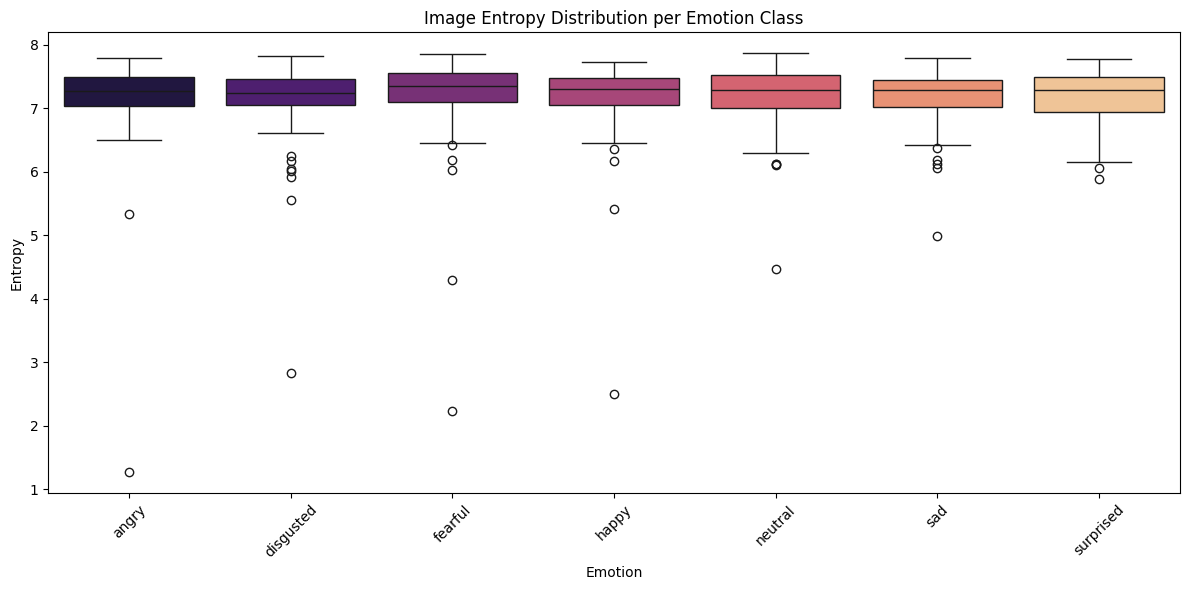

In [ ]:
from scipy.stats import entropy as calc_entropy

entropy_data = []

for emotion in os.listdir('Data_Sets/train'):
    emotion_dir = os.path.join('Data_Sets/train', emotion)
    for img_name in os.listdir(emotion_dir)[:150]:
        img_path = os.path.join(emotion_dir, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            hist = cv2.calcHist([img], [0], None, [256], [0,256])
            hist = hist.ravel() / hist.sum()
            ent = calc_entropy(hist, base=2)
            entropy_data.append((emotion, ent))

df_entropy = pd.DataFrame(entropy_data, columns=['Emotion', 'Entropy'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_entropy, x='Emotion', y='Entropy', palette='magma')
plt.title("Image Entropy Distribution per Emotion Class")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


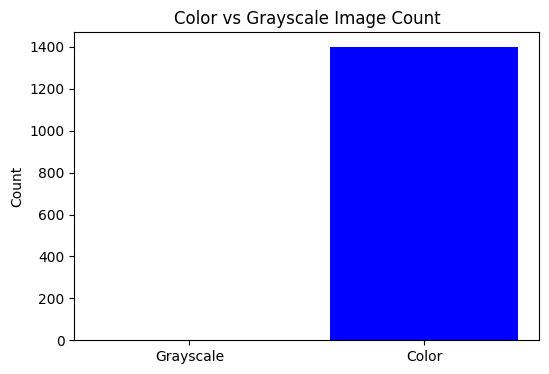

In [ ]:
color_counts = {"Grayscale": 0, "Color": 0}

for emotion in os.listdir('Data_Sets/train'):
    emotion_dir = os.path.join('Data_Sets/train', emotion)
    for img_name in os.listdir(emotion_dir)[:200]:
        img_path = os.path.join(emotion_dir, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            if len(img.shape) == 3 and img.shape[2] == 3:
                color_counts["Color"] += 1
            else:
                color_counts["Grayscale"] += 1

plt.figure(figsize=(6, 4))
plt.bar(color_counts.keys(), color_counts.values(), color=['gray', 'blue'])
plt.title("Color vs Grayscale Image Count")
plt.ylabel("Count")
plt.show()


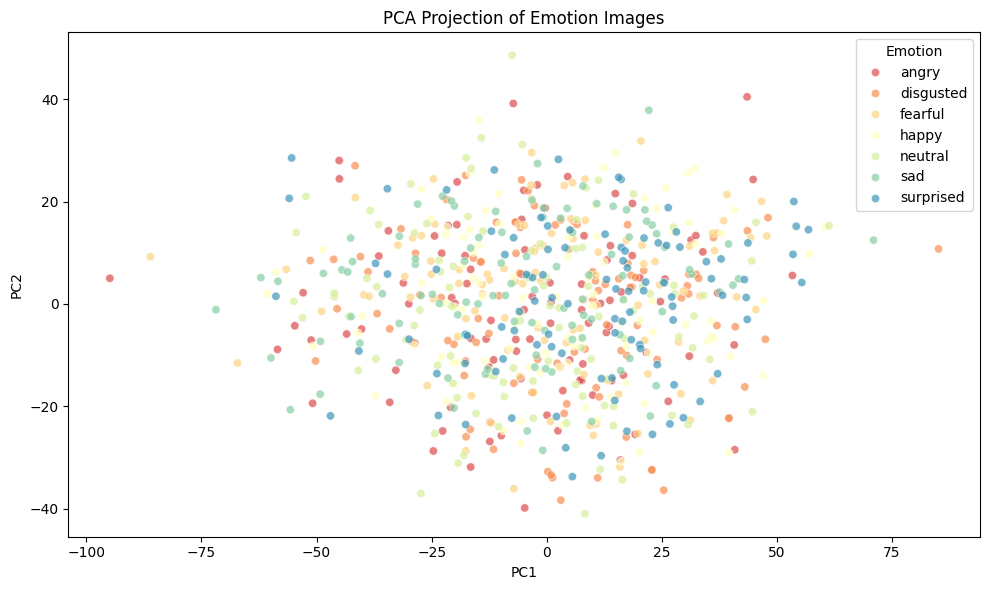

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

img_data = []
img_labels = []

for label in os.listdir("Data_Sets/train"):
    path = os.path.join("Data_Sets/train", label)
    for img_name in os.listdir(path)[:100]:
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (48, 48))
            img_flat = img.flatten()
            img_data.append(img_flat)
            img_labels.append(label)

X = StandardScaler().fit_transform(img_data)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca['Emotion'] = img_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Emotion", palette="Spectral", alpha=0.7)
plt.title("PCA Projection of Emotion Images")
plt.tight_layout()
plt.show()


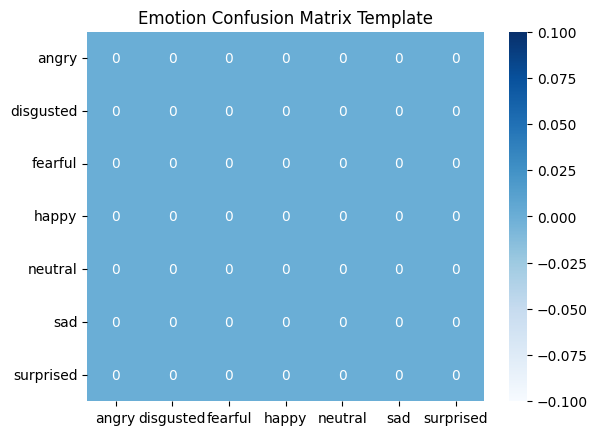

In [ ]:
conf_matrix = pd.DataFrame(np.zeros((7, 7)), index=class_names, columns=class_names)
sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="Blues")
plt.title("Emotion Confusion Matrix Template")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import os


In [ ]:
batch_size = 32
img_size = (48, 48)

train_ds = image_dataset_from_directory("Data_Sets/train",
                                        label_mode='int',
                                        image_size=img_size,
                                        batch_size=batch_size,
                                        shuffle=True)

val_ds = image_dataset_from_directory("Data_Sets/test",
                                      label_mode='int',
                                      image_size=img_size,
                                      batch_size=batch_size)

class_names = train_ds.class_names
num_classes = len(class_names)
print("Class Names:", class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.
Class Names: ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [ ]:
# Extract labels for computing weights
y_labels = []
for images, labels in train_ds.unbatch():
    y_labels.append(labels.numpy())

class_weights = compute_class_weight(class_weight="balanced",
                                     classes=np.unique(y_labels),
                                     y=np.array(y_labels))

class_weights = {i: w for i, w in enumerate(class_weights)}
print("Class Weights:", class_weights)


Class Weights: {0: 1.0266046844269623, 1: 9.406618610747051, 2: 1.0010460615781582, 3: 0.5684387684387684, 4: 0.8260394187886635, 5: 0.8491274770777877, 6: 1.293372978330405}


In [ ]:
def build_emotion_cnn(input_shape=(48, 48, 3), num_classes=7):
    model = models.Sequential()

    model.add(layers.Rescaling(1./255, input_shape=input_shape))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(2, 2))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(2, 2))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(2, 2))
    model.add(layers.Dropout(0.4))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

model = build_emotion_cnn()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 48, 48, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       7

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint("best_emotion_model.h5", save_best_only=True)
]


In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    class_weight=class_weights,
    callbacks=callbacks
)

898/898 [==============================] - 662s 736ms/step - loss: 2.1902 - accuracy: 0.2335 - val_loss: 2.4622 - val_accuracy: 0.1530


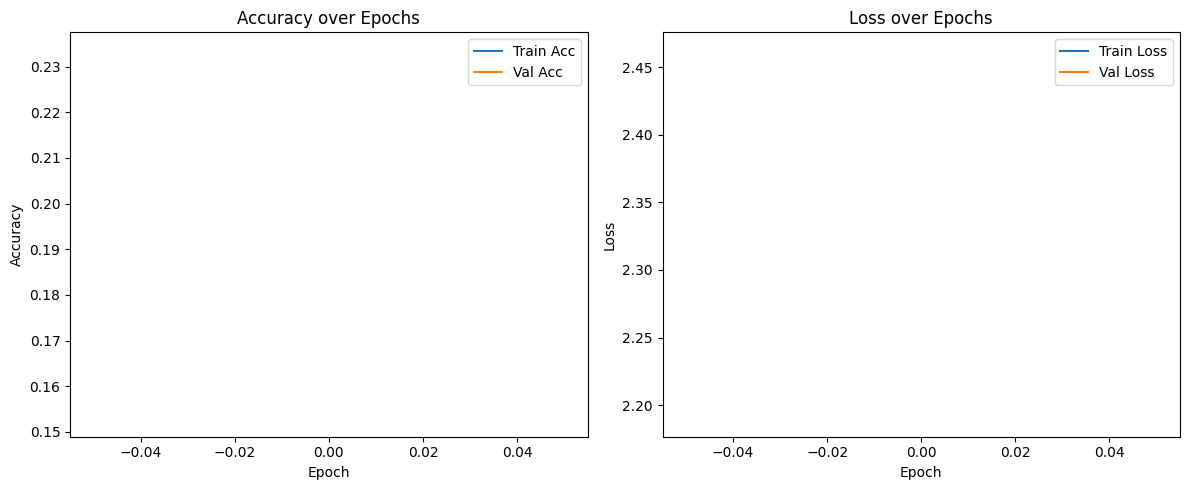

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Acc")
    plt.plot(history.history["val_accuracy"], label="Val Acc")
    plt.title("Accuracy over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.title("Loss over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)


Found 7178 files belonging to 7 classes.


e:\Emotion_Detection\env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Emotion_Detection\env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Emotion_Detection\env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       angry       0.00      0.00      0.00       958
   disgusted       0.00      0.00      0.00       111
     fearful       0.14      1.00      0.25      1024
       happy       0.00      0.00      0.00      1774
     neutral       0.00      0.00      0.00      1233
         sad       0.00      0.00      0.00      1247
   surprised       0.00      0.00      0.00       831

    accuracy                           0.14      7178
   macro avg       0.02      0.14      0.04      7178
weighted avg       0.02      0.14      0.04      7178



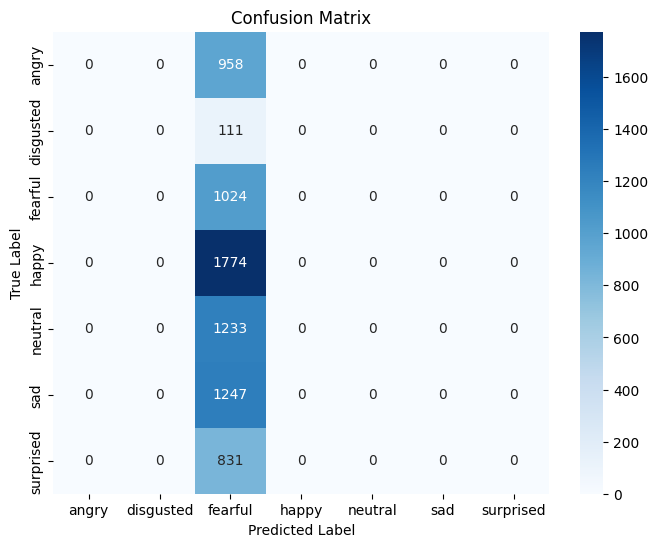

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# STEP 1: Define class names and load validation dataset (adjust path as needed)
class_names = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

val_ds = tf.keras.utils.image_dataset_from_directory(
    "Data_Sets/test",
    image_size=(48, 48),  # change according to your model input size
    batch_size=32,
    label_mode='int'
)

# STEP 2: Normalize images
val_ds = val_ds.map(lambda x, y: (x / 255.0, y))

# STEP 3: Collect predictions
val_labels = []
val_preds = []

for images, labels in val_ds.unbatch():
    val_labels.append(labels.numpy())
    preds = model.predict(tf.expand_dims(images, axis=0), verbose=0)
    val_preds.append(np.argmax(preds))

# STEP 4: Classification report
print(classification_report(val_labels, val_preds, target_names=class_names))

# STEP 5: Confusion matrix
cm = confusion_matrix(val_labels, val_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
val_labels = []
val_preds = []

for images, labels in val_ds.unbatch():
    val_labels.append(labels.numpy())
    preds = model.predict(tf.expand_dims(images, axis=0), verbose=0)
    val_preds.append(np.argmax(preds))


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(val_labels, val_preds, target_names=class_names))


              precision    recall  f1-score   support

       angry       0.00      0.00      0.00       958
   disgusted       0.00      0.00      0.00       111
     fearful       0.14      1.00      0.25      1024
       happy       0.00      0.00      0.00      1774
     neutral       0.00      0.00      0.00      1233
         sad       0.00      0.00      0.00      1247
   surprised       0.00      0.00      0.00       831

    accuracy                           0.14      7178
   macro avg       0.02      0.14      0.04      7178
weighted avg       0.02      0.14      0.04      7178



e:\Emotion_Detection\env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Emotion_Detection\env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Emotion_Detection\env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


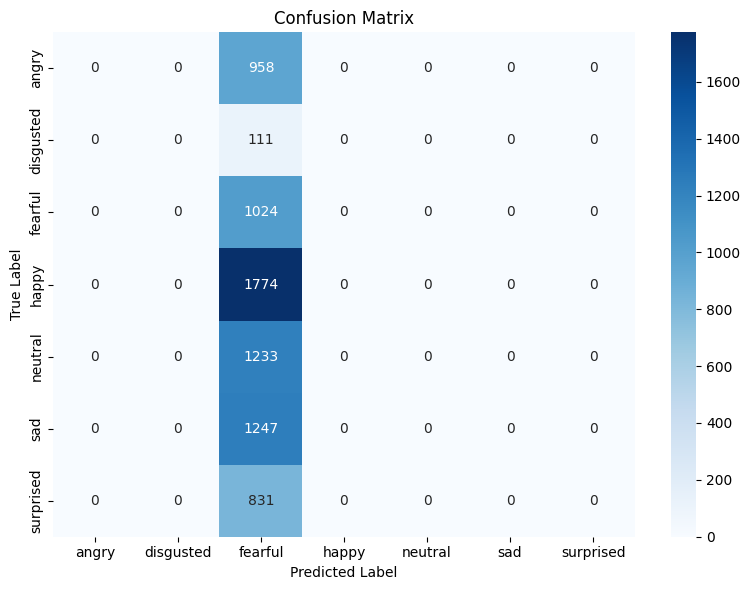

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(val_labels, val_preds)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(val_labels, val_preds)
print(f"Validation Accuracy: {acc:.4f}")


Validation Accuracy: 0.1427


In [ ]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(val_labels, val_preds)
print(f"Cohen's Kappa Score: {kappa:.4f}")


Cohen's Kappa Score: 0.0000


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize true labels
val_labels_bin = label_binarize(val_labels, classes=range(num_classes))
val_preds_bin = label_binarize(val_preds, classes=range(num_classes))

auc_score = roc_auc_score(val_labels_bin, val_preds_bin, average="macro")
print(f"Macro ROC AUC Score: {auc_score:.4f}")


Macro ROC AUC Score: 0.5000


In [ ]:
# Save model architecture + weights + optimizer state
model.save("ML_Model\emotion_model.h5")
print(" Model saved as emotion_model.h5")


 Model saved as emotion_model.h5


In [ ]:
model.save("ML_Model\emotion_model_saved", save_format="tf")
print("Model saved in TensorFlow SavedModel format")


INFO:tensorflow:Assets written to: ML_Model\emotion_model_saved\assets


INFO:tensorflow:Assets written to: ML_Model\emotion_model_saved\assets


Model saved in TensorFlow SavedModel format


In [ ]:
# Save architecture only
model_json = model.to_json()
with open("ML_Model\emotion_model_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Save weights
model.save_weights("ML_Model\emotion_model_weights.h5")
print(" Saved model architecture + weights separately")



 Saved model architecture + weights separately


In [ ]:

from tensorflow.keras.models import load_model

# Load the model
model = load_model("ML_Model\emotion_model.h5")
print(" Model loaded successfully.")


 Model loaded successfully.


In [ ]:
import tensorflow as tf

img_size = (48, 48)
batch_size = 32

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Data_Sets/test",
    label_mode='int',
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False  # Important for correct order in prediction
)

class_names = test_ds.class_names
print("Class Names:", class_names)


Found 7178 files belonging to 7 classes.
Class Names: ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [ ]:
import numpy as np

y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)


              precision    recall  f1-score   support

       angry       0.46      0.20      0.28       958
   disgusted       0.20      0.63      0.30       111
     fearful       0.37      0.12      0.18      1024
       happy       0.75      0.62      0.68      1774
     neutral       0.34      0.68      0.46      1233
         sad       0.41      0.30      0.35      1247
   surprised       0.53      0.78      0.63       831

    accuracy                           0.47      7178
   macro avg       0.44      0.48      0.41      7178
weighted avg       0.49      0.47      0.45      7178



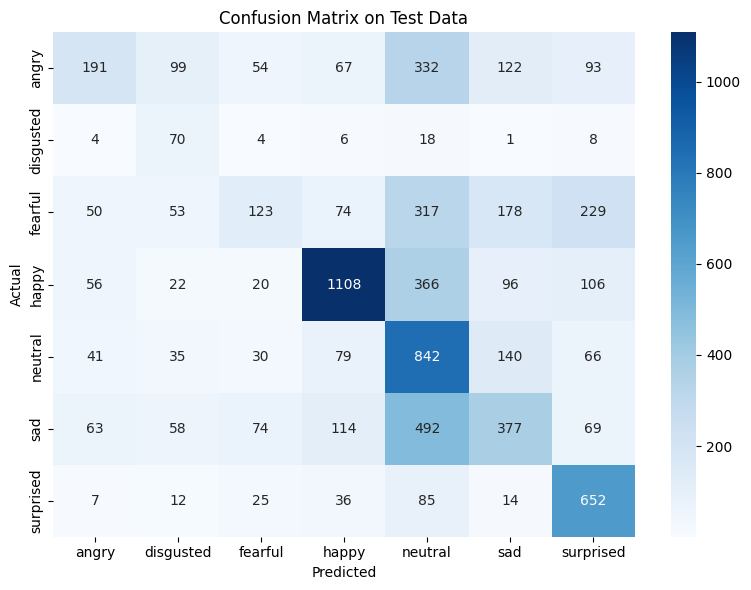

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classification Report
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix on Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_true, y_pred)
print(f" Test Accuracy: {acc:.4f}")


 Test Accuracy: 0.4685


In [ ]:
import cv2
import matplotlib.pyplot as plt

def predict_emotion(image_path, model, class_names, img_size=(48, 48)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Image not found.")
        return
    img = cv2.resize(img, img_size)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)  # model expects 3 channels
    img = img / 255.0  # normalize
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img, verbose=0)
    predicted_class = class_names[np.argmax(prediction)]

    plt.imshow(cv2.imread(image_path), cmap='gray')
    plt.title(f"Predicted Emotion: {predicted_class}")
    plt.axis('off')
    plt.show()


In [ ]:
predict_emotion("path/to/your/custom/image.jpg", model, class_names)


Image not found.


In [ ]:
!pip install keras-tuner


You should consider upgrading via the 'e:\emotion_detection\env\scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
import keras_tuner as kt

def build_model(hp):
    model = tf.keras.Sequential()
    model.add(layers.Rescaling(1./255, input_shape=(48, 48, 3)))

    for i in range(hp.Int("conv_layers", 2, 4)):
        model.add(layers.Conv2D(hp.Int(f"filters_{i}", 32, 128, step=32), 
                                kernel_size=3, activation="relu", padding="same"))
        model.add(layers.BatchNormalization())
        model.add(layers.MaxPooling2D())
        model.add(layers.Dropout(hp.Float(f"dropout_{i}", 0.2, 0.5, step=0.1)))

    model.add(layers.Flatten())
    model.add(layers.Dense(hp.Int("dense_units", 128, 512, step=64), activation="relu"))
    model.add(layers.Dense(num_classes, activation="softmax"))

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='tuner_dir',
    project_name='emotion_cnn'
)

tuner.search(train_ds, validation_data=val_ds, epochs=10)
best_model = tuner.get_best_models(num_models=1)[0]
best_model.save("ML_Model\best_emotion_model_tuned.h5")


In [ ]:
X = []
y = []

for images, labels in train_ds.unbatch():
    X.append(images.numpy())
    y.append(labels.numpy())

X = np.array(X)
y = np.array(y)


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
for train_index, val_index in kf.split(X, y):
    print(f"\nFold {fold}")
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    model = build_emotion_cnn()
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), batch_size=32)

    preds = np.argmax(model.predict(X_val), axis=1)
    print("Fold Accuracy:", accuracy_score(y_val, preds))
    fold += 1
